In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
#load dataset
df=pd.read_csv("loan_data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [93]:
df=df.drop(columns='Loan_ID',axis=1)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             376 non-null    float64
 1   Married            381 non-null    int64  
 2   Dependents         373 non-null    float64
 3   Education          381 non-null    int64  
 4   Self_Employed      360 non-null    float64
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   370 non-null    float64
 9   Credit_History     351 non-null    float64
 10  Property_Area      381 non-null    int64  
 11  Loan_Status        381 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 46.8 KB


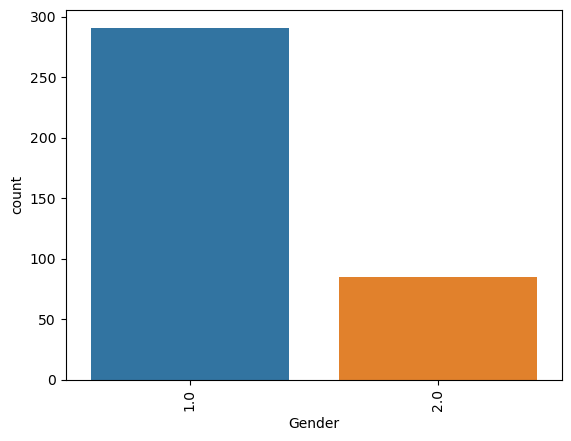

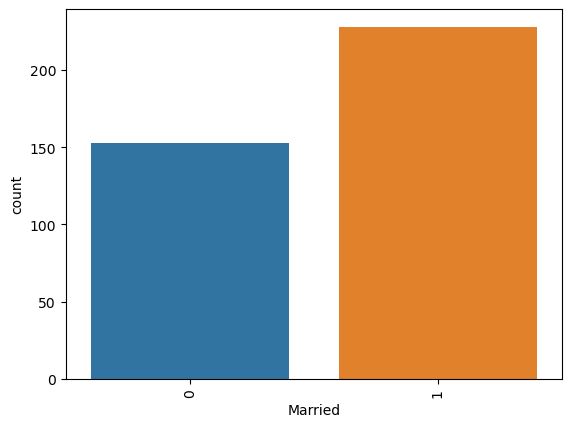

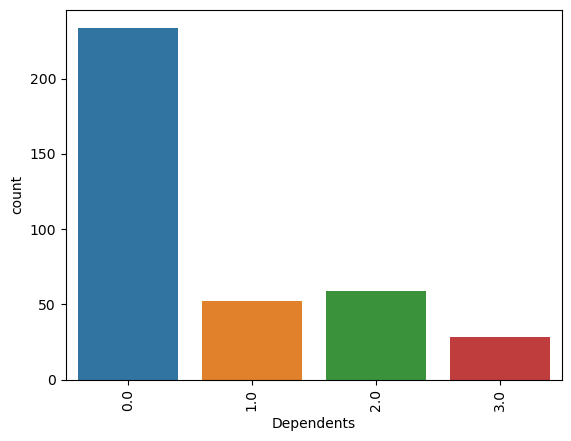

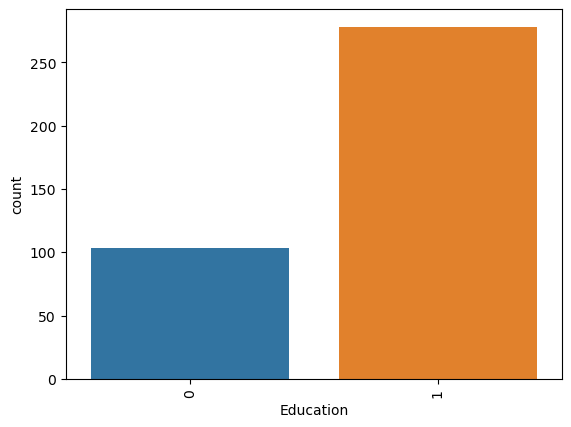

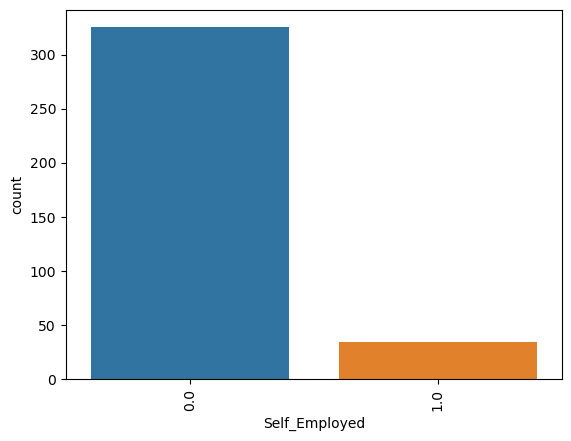

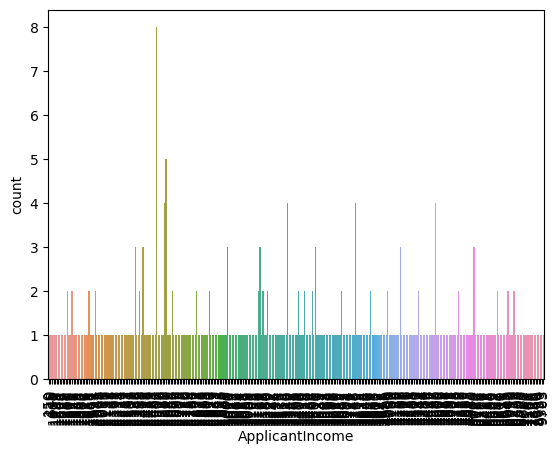

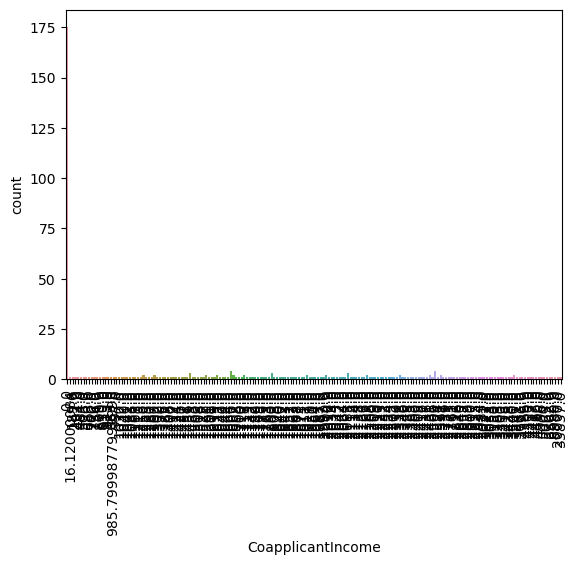

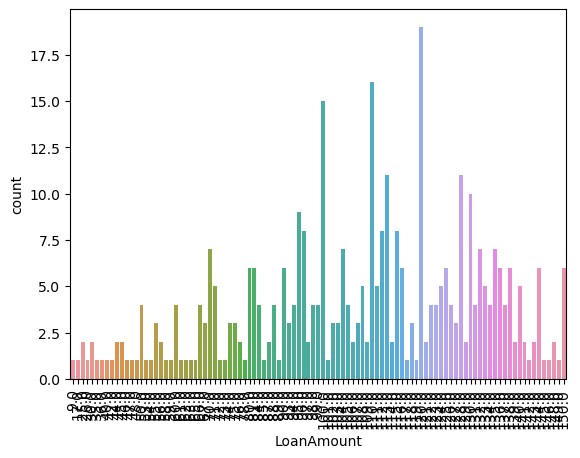

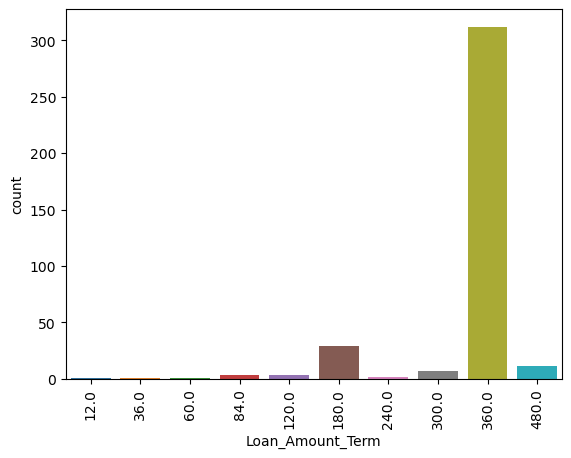

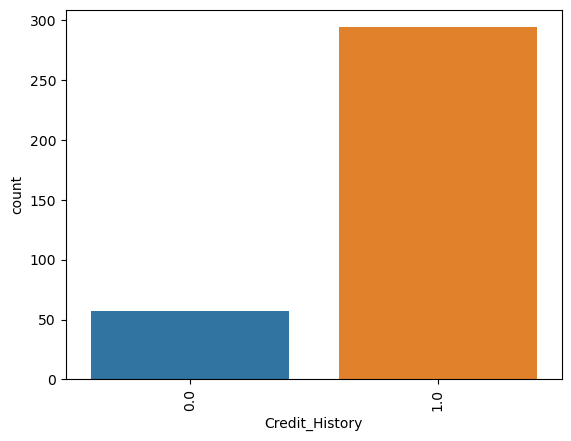

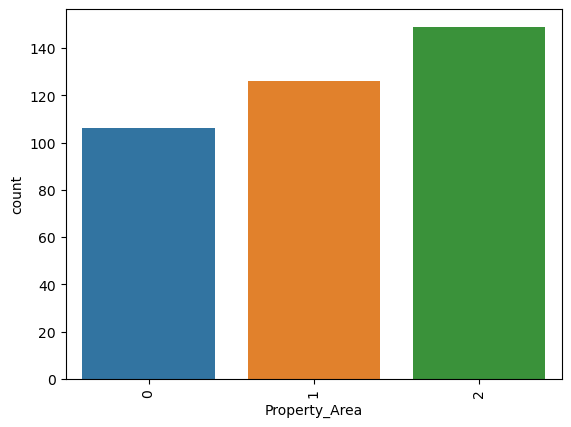

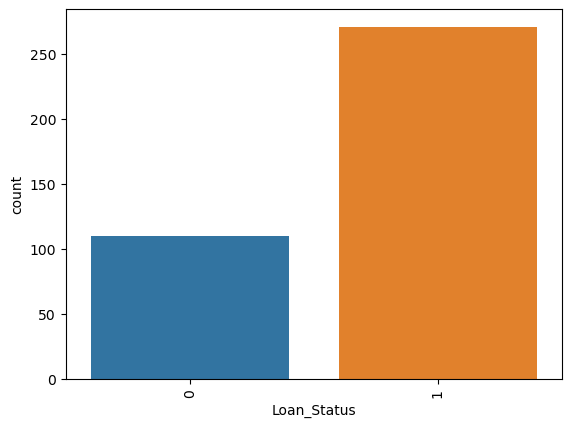

In [95]:
## Plotting bar plots for categorical data columns
for col in df.columns:
    plt.figure()
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=90)

In [116]:
df['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)
df['Married'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['Dependents'].replace({'1': 1, '0': 0, "2":2,"3+":3}, inplace=True)
df['Education'].replace({'Graduate': 1, 'Not Graduate': 0}, inplace=True)
df['Self_Employed'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['Property_Area'].replace({'Rural': 0, 'Urban': 1, "Semiurban":2}, inplace=True)
df['Loan_Status'].replace({'N': 0, 'Y': 1}, inplace=True)

In [102]:
df[df.columns].describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,376.000000,381.000000,373.000000,381.000000,360.000000,381.000000,381.000000,381.000000,370.000000,351.000000,381.000000,381.000000
mean,1.226064,0.598425,0.680965,0.729659,0.097222,3579.845144,1277.275381,104.986877,340.864865,0.837607,1.112861,0.711286
std,0.418838,0.490861,0.993304,0.444720,0.296672,1419.813818,2340.818114,28.358464,68.549257,0.369338,0.811346,0.453761
min,1.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2600.000000,0.000000,90.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3333.000000,983.000000,110.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,4288.000000,2016.000000,127.000000,360.000000,1.000000,2.000000,1.000000
max,2.000000,1.000000,3.000000,1.000000,1.000000,9703.000000,33837.000000,150.000000,480.000000,1.000000,2.000000,1.000000


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             308 non-null    float64
 1   Married            308 non-null    int64  
 2   Dependents         308 non-null    float64
 3   Education          308 non-null    int64  
 4   Self_Employed      308 non-null    float64
 5   ApplicantIncome    308 non-null    int64  
 6   CoapplicantIncome  308 non-null    float64
 7   LoanAmount         308 non-null    float64
 8   Loan_Amount_Term   308 non-null    float64
 9   Credit_History     308 non-null    float64
 10  Property_Area      308 non-null    int64  
 11  Loan_Status        308 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 31.3 KB


In [33]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [107]:
#filter null data out
df=df.dropna(how='any')

In [108]:
#check null data
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [118]:
df.shape

(308, 12)

In [121]:
from sklearn.model_selection import train_test_split

X=df.drop(['Loan_Status'], axis = 1) 
y=df['Loan_Status']

#split to train and test data 70:30
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.3,
                                                shuffle = True,
                                                stratify=y,
                                                random_state=42)

In [122]:

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [125]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8279569892473119


In [135]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000014315C530A0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000014315A382B0>})

In [136]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 7, 'n_estimators': 469}


In [167]:
from sklearn.metrics import f1_score
rf = RandomForestClassifier(n_estimators=469,max_depth=7)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred)
print("F1-Score: ", f1)

Accuracy: 0.8387096774193549
F1-Score:  0.896551724137931


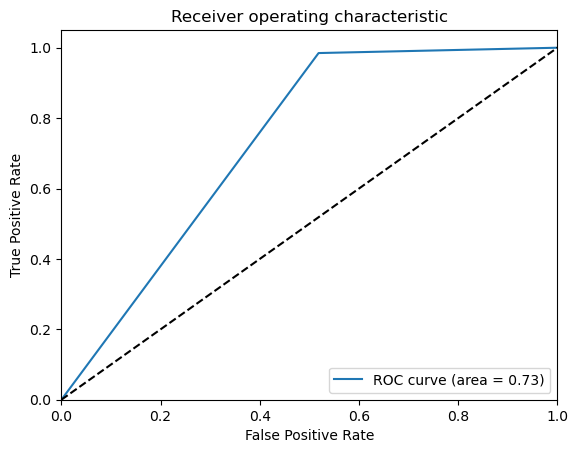

In [168]:
from sklearn.metrics import roc_curve, auc
#import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [172]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[13 14]
 [ 1 65]]


In [171]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.48      0.63        27
           1       0.82      0.98      0.90        66

    accuracy                           0.84        93
   macro avg       0.88      0.73      0.77        93
weighted avg       0.85      0.84      0.82        93

